In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def display(matrix, model, shot) :

    plt.figure(figsize=(8,6), dpi=100)
    sns.set(font_scale = 1.1)

    ax = sns.heatmap(matrix, annot=True, fmt='d', cmap="rocket_r")

    ax.set_xlabel("Predicted", fontsize=14, labelpad=20)
    ax.xaxis.set_ticklabels(['Female', 'Male'])

    ax.set_ylabel("Actual", fontsize=14, labelpad=20)
    ax.yaxis.set_ticklabels(['Female', 'Male'])

    s = "zero" if shot == 0 else "few"
    ax.set_title("Confusion Matrix for " + model +  " " + s + " shot.", fontsize=14, pad=20)

    plt.savefig("5-2_"+model+"_"+str(shot)+".png", format="png", bbox_inches="tight")
    plt.show()

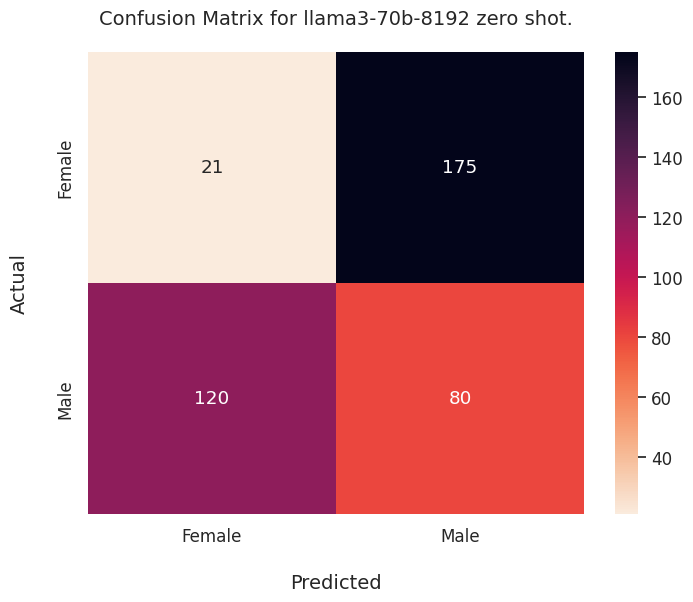

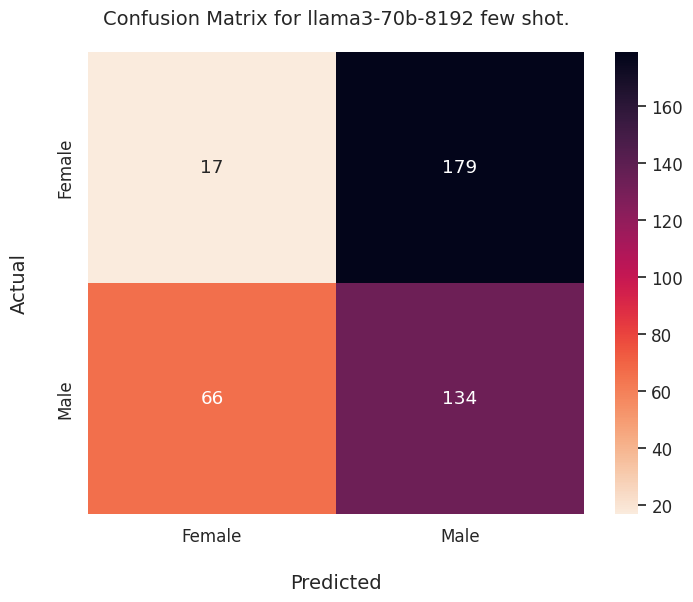

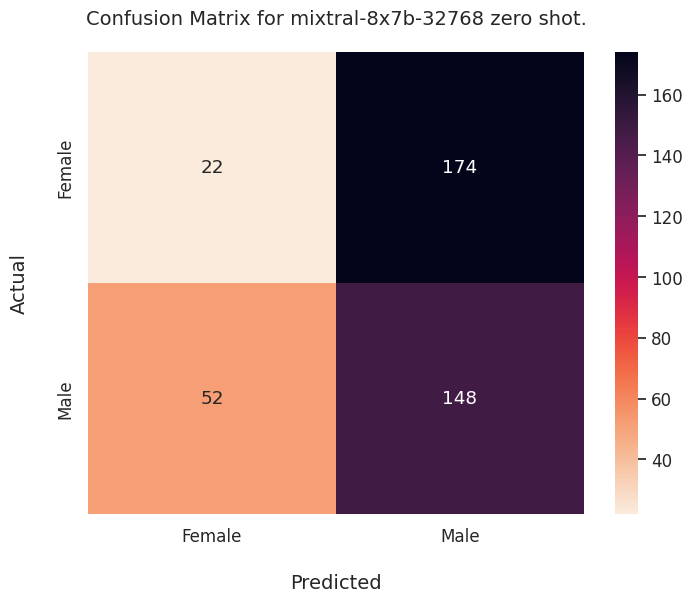

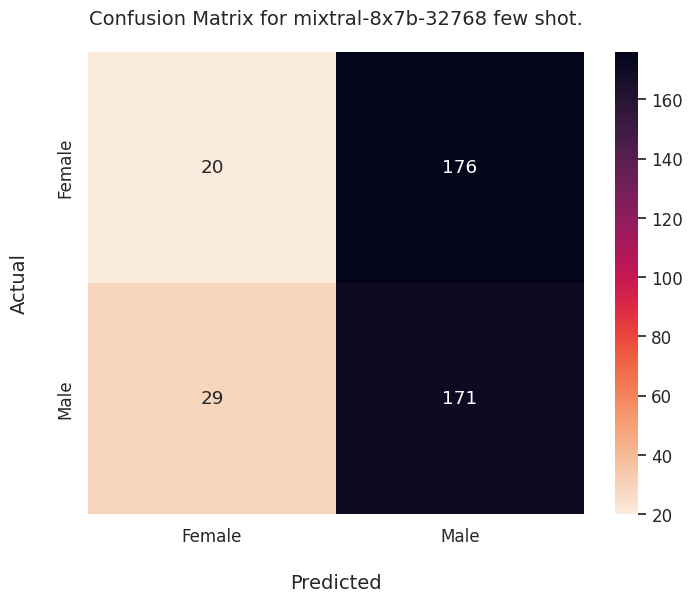

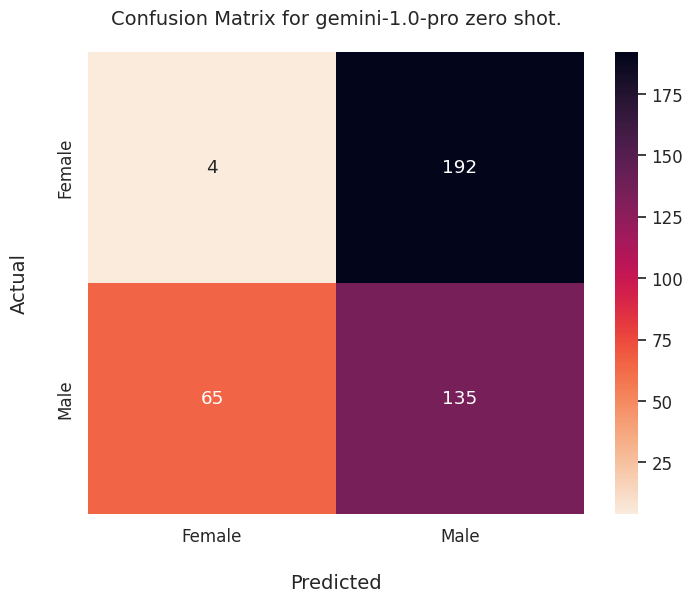

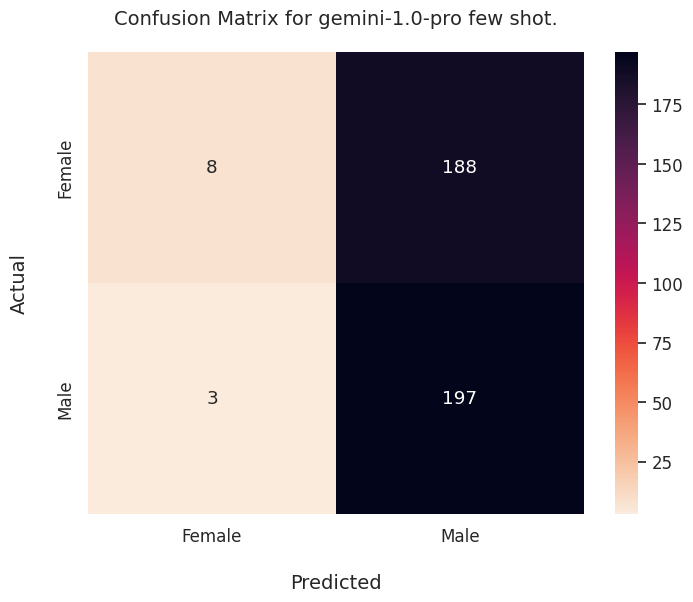

In [3]:
mapping = {'his':'male', 'him':'male', 'he':'male', 'her':'female', 'she':'female'}
models = ["llama3-70b-8192", "mixtral-8x7b-32768", "gemini-1.0-pro"]

for each_model in models :

    for shot in range(0,2) :

        name = each_model + "_" + str(shot) + "_label.csv"
        df = pd.read_csv(name)

        true = df['Gold'].tolist()
        new_true = [mapping.get(each) for each in true]

        predict = df['Predicted'].tolist()

        cf_matrix = confusion_matrix(new_true, predict)
        # print(cf_matrix)
        display(cf_matrix, each_model, shot)

